<h2 align= "center"><b>Client: Sales Effectiveness | Category: Product Sales</b></h2>
<h2 align= "center"><b>Project Ref: PM-PR-0019 | Team id: PTID-CDS-JAN-24-1772</b></h2>


#### **BUSINESS CASE**

FicZon Inc is an IT solution provider with products ranging from on-premises products to SAAS based solutions.  FicZon major leads generation channel is digital and through their website. 

FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.  

Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation. 

FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

#### PROJECT GOAL:

1. Data exploration insights-Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential)


#### **IMPORTING THE REQUIRED LIBRARIES**

In [3]:
# Importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import mysql.connector as connector
import os
from dotenv import load_dotenv

#### **IMPORTING THE DATA**

In [4]:
# Loading environment variables from .env file

load_dotenv()

True

In [5]:
# Fetching database connection parameters from environment variables

db_params = {
    'dbname': os.environ.get('DB_NAME'),
    'table': os.environ.get('DB_TABLE_NAME'),
    'host': os.environ.get('DB_HOST'),
    'port': os.environ.get('DB_PORT'),
    'username': os.environ.get('DB_USERNAME'),
    'password': os.environ.get('DB_PASSWORD'),
}

In [6]:
connection = connector.connect(host=db_params['host'], user=db_params['username'], password=db_params['password'], database=db_params['dbname'])

In [7]:
# List of Databases

cursor = connection.cursor()
cursor.execute('show databases')
for database in cursor:
    print(database)

('information_schema',)
('project_sales',)


In [8]:
# List of Tables

db_tables = pd.read_sql_query('show tables', connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [9]:
query = 'select * from data'
output_from_database = pd.read_sql_query(query, connection)
output_from_database

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [10]:
directory = 'data'

if not os.path.exists(directory):
    os.makedirs(directory)

directory_path = os.path.join(directory, 'data.csv')
output_from_database.to_csv(directory_path, index=False)

print(f'Data saved successfully {directory_path}')

Data saved successfully data\data.csv


In [4]:
data= pd.read_csv(r"E:\Lead_quality_categorization_for_enhanced_sales\data\data.csv")
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


#### **DOMAIN ANALYSIS**

FicZon Inc is facing a decline in sales due to increased competition. They rely on manual methods to assess lead quality, which is inefficient. By implementing Machine Learning to automatically categorize leads, FicZon aims to enhance their sales process and boost sales performance.

The features and their description include the following:
- **Created -**  Created is date and time on which the lead was generated.
- **Product_ID -** Product_ID is the Serial no. of the product.
- **Source -** Source ,from where the lead has generated like website , phonecall , email etc.
- **Mobile -** Mobile number of the lead or customer
- **EMAIL -** EMAIL of the lead.
- **Sales_Agent -** Sales_Agent is the agent who generated the lead.
- **Location -** Location is the address of the lead / from where the lead has generated.
- **Delivery_Mode -** how the product has deliveried to lead or what type of delivery mode.
- **Status -** Status of current lead .

#### **BASIC CHECKS**

In [5]:
# displaying first five rows
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [6]:
# displaying the last five rows
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [7]:
data.shape # 7422 no of rows, 9 columns

(7422, 9)

In [8]:
# getting basic information such as datatype, null values etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


### Insights:
- Created is Datetime Column but it is in Object type ( Convert it into datetime64).
- Product_ID is a integer but it is in float.
- Source  is a String with few missing values.
- Mobile number is an integer but it is in float with missing values .
- EMAIL is string.
- Sales_Agent , Location are objects with missing values.

In [12]:
data.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [11]:
# getting basic statistical information
data.describe(include= "object")

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


### Insights:-
- 25 categories of Source are there but **2547 Leads were generated from Call Source only** .
- Mobile number and EMAIL are not showing any explicit information about leads but shows the information of those who are interested in the products.
- 12 Sales Agents are there but **Sales-Agent-4 alone make 1500 Leads**. Hence it is inferred that he is better than the others.
- 2500 Leads were generated from other locations .
- There are 5 different ways to deliver products but Mode-5 used for 2975 times , so this is the easiest & popular way .
- There are **11 different types of leads Status** who were generated but 1536 leads were junk  leads.

#### **EXPLORATORY DATA ANALYSIS**

#### UNIVARIATE ANALYSIS:

In [13]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [17]:
# converting "created" column from object datatype to datatime format
data['created']= data['Created'].astype('datetime64[s]')


In [18]:
# creating different columns for year, month, day, hour, minutes
data['year']= data['created'].dt.year
data['month']= data['created'].dt.month
data['day']= data['created'].dt.day
data['hour']=data['created'].dt.hour
data['minutes']= data['created'].dt.minute

In [19]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,created,year,month,day,hour,minutes
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,2018-11-14 10:05:00,2018,11,14,10,5
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 09:22:00,2018,11,14,9,22
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 09:21:00,2018,11,14,9,21
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 08:46:00,2018,11,14,8,46
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 07:34:00,2018,11,14,7,34


In [23]:
data.nunique()

Created          6752
Product_ID         29
Source             25
Mobile            486
EMAIL             883
Sales_Agent        12
Location           17
Delivery_Mode       5
Status             11
created          6752
year                1
month              12
day                26
hour               24
minutes            60
dtype: int64

Insights:
- All leads are created in the same year(i.e., 2018)

In [27]:
# plotting countplot for categorical features
categorical_features= [column for column in data[['Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status', 'month']]]
categorical_features

['Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status', 'month']

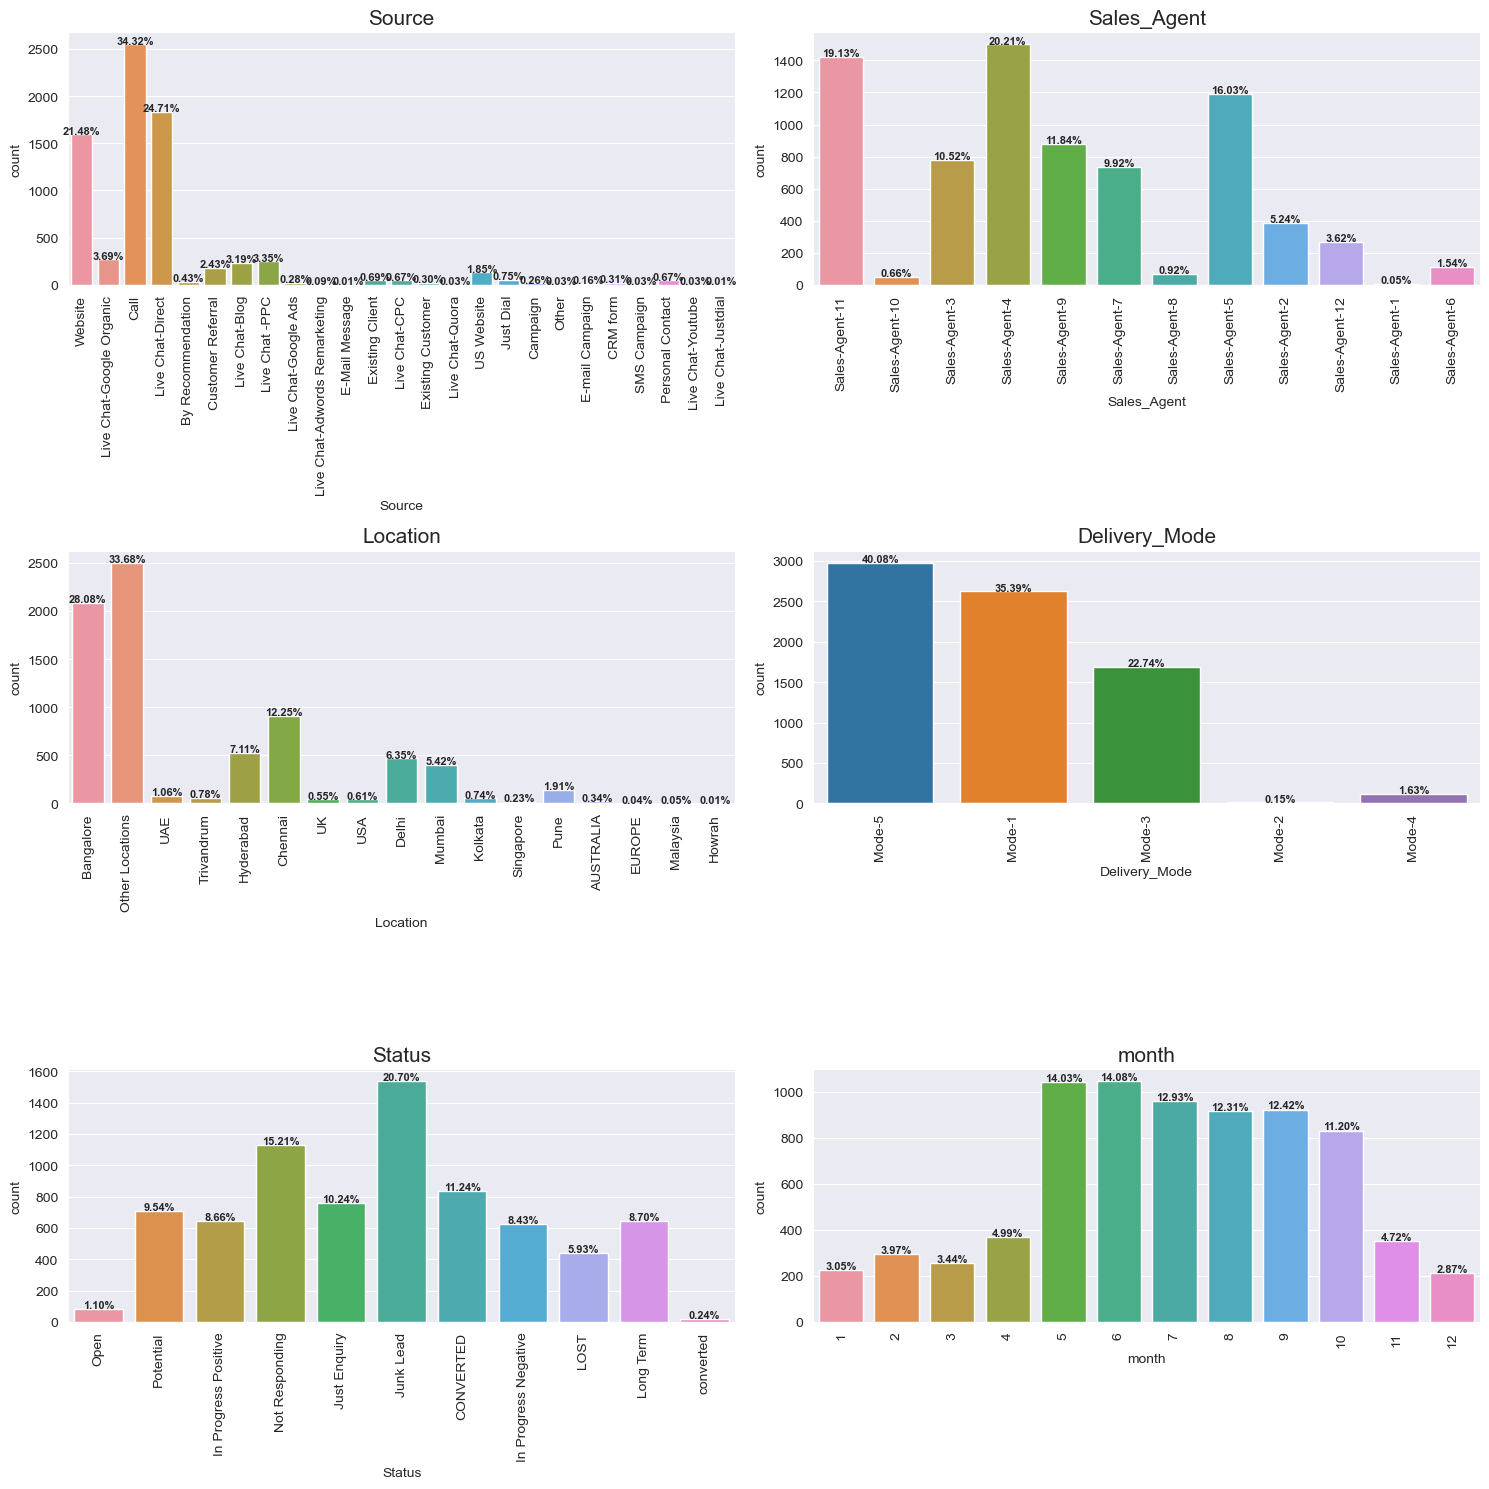

In [37]:
plt.figure(figsize= (15, 15), facecolor= 'white')
sns.set_style('darkgrid')
plotnumber=1

for column in categorical_features:
  if plotnumber <=6:
    ax= plt.subplot(3,2, plotnumber)
    sns.countplot(data= data, x= column)\
    .set_title(f'{column}', fontsize= 15)
    plt.xticks(rotation= 90)

    
    # Displaying bar values in percentage rounded off to two decimal digits with '%' sign
    # calculates the total no of datapoints for % 
    total = float(len(data))

    # iterates through each patch (bar)
    for p in ax.patches:
            # get_height()--> height of the current bar
            height = p.get_height()
            # positions the text at the center of each bar 
            ax.text(p.get_x() + p.get_width() / 2., height + 5,
                    f'{height / total * 100:.2f}%', ha="center", fontsize=8, fontweight= 'bold')
        
  plotnumber +=1
plt.tight_layout()
plt.show()

#### Insights:
- **Source**:
  - Around 34 % Leads were generated from Call Source followed by around 25% of leads from live chat-direct.
  - Around 21 % Leads were generated from their Website .
  - Hence **Call source has the maximum frequency** and the combination of **three sources(i.e., call source, live chat-direct and website)** constitute around  **80% of sources**.
  - The rest are generated by other sources

- **Sales Agent**
  - Agent 4, Agent 11, Agent 5 together generated around 56% of leads.
  - Agent-3 , Agent-4 , Agent-5 , Agent-7 , Agent-9 and Agent-11 together generated More than 87 %Leads. 
  - **Sales agent 4 has generated the highest no of leads**.

- **Location**
  - 33 % Leads were generated from Other Locations.
  - From **Bangalore 28% and Chennai 12%  Leads** were Generated.
  - From Hyderabad 7% , Delhi 6% and Mumbai 5%  Leads were Generated.
  - The rest of the locations have very small no of leads.

- **Delivery mode**:
  - Most of the leads preferred Mode-5 , Mode-1 ,Mode-3 type of deliveries.

- **Status**:
  - 20 % Leads that are generated were Junk Leads.
  - 15 % Leads were Not Responding.
  - 11 % Leads got Converted(Success).
  - 10 % Leads are just Enquired.

- **leads generated month-wise**:
  -  76% leads were generated between **May to October** month.

#### BIIVARIATE ANALYSIS:

In [40]:
# lead Status column need to be pre-processed to get a target variable

In [39]:
data['Status'].unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

- There is no explicit target variable given.
- Hence the lead "status" column should be analysed and the categories in that column need to be segregated into two broad types such as:

  - **High Potential -  CONVERTED, Potential, In Progress Positive, converted**
  - **Low Potential - Junk Lead, Not Responding, Just Enquiry, Long Term, In Progress Negative, LOST and Open**

In [ ]:
# High Potential Leads

data.loc[data['Status']=="CONVERTED",'Status'] = "High Potential"
data.loc[data['Status']=='Potential',"Status"] = "High Potential"
data.loc[data['Status']=='In Progress Positive',"Status"] = "High Potential"
data.loc[data['Status']=="converted" , 'Status'] = "High Potential"


# Low POtential Leads

data.loc[data['Status']=="Junk Lead",'Status'] = "Low Potential"
data.loc[data['Status']=="Not Responding",'Status'] = "Low Potential"
data.loc[data['Status']=="Just Enquiry",'Status'] = "Low Potential"
data.loc[data['Status']=="Long Term",'Status'] = "Low Potential"
data.loc[data['Status']=='In Progress Negative',"Status"] = "Low Potential"
data.loc[data['Status']=="LOST",'Status'] = "Low Potential"
data.loc[data['Status']=='Open',"Status"] = "Low Potential"